## Introduction

This notebook presents an analysis of chronic disease prevalence and Medicare utilization across the U.S., with a focus on selected states: Texas, New York, California, and Florida. The analysis utilizes a publicly available dataset stratified by age, gender, and Medicare status, providing insights into chronic health conditions and associated healthcare utilization metrics.

The project is structured into four main parts:

1. Analyzing the data

2. Chronic Disease Prevalence: Examining the prevalence of chronic conditions based on age and available demographic groups, comparing national data with that of Texas, New York, California, and Florida.

3. Medicare Utilization Analysis: Providing an overview of Medicare utilization metrics (total payments, hospital readmission rates, and ER visits) concerning various chronic conditions, with national and state-level comparisons.

4. State-wise Prevalence Analysis: Identifying states with the highest and lowest chronic disease prevalence rates compared to the national average, stratified by gender and available demographic groups.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data Loading and Initial Inspection

This section loads the provided chronic disease dataset and performs an initial inspection to understand its structure, columns, and data types.

The dataset includes the following key columns:

    Bene_Geo_Lvl: Geographic level of the data (e.g., 'State', 'National').

    Bene_Geo_Desc: Geographic description (e.g., 'Alabama', 'Texas', 'National').

    Bene_Age_Lvl: Age stratification (e.g., 'All', '65+', '<65').

    Bene_Demo_Lvl: Demographic stratification level (e.g., 'All', 'Sex', 'Dual Status').

    Bene_Demo_Desc: Demographic description (e.g., 'All', 'Female', 'Male', 'Medicare Only', 'Medicare and Medicaid').

    Bene_Cond: Chronic condition (e.g., 'Alcohol Abuse', 'Diabetes', 'Arthritis').

    Prvlnc: Prevalence rate of the chronic condition.

    Tot_Mdcr_Stdzd_Pymt_PC: Total Medicare Standardized Payment Per Capita.

    Tot_Mdcr_Pymt_PC: Total Medicare Payment Per Capita.

    Hosp_Readmsn_Rate: Hospital Readmission Rate.

    ER_Visits_Per_1000_Benes: Emergency Room Visits Per 1000 Beneficiaries.

In [98]:
# Load the dataset
df = pd.read_csv('data/chronic-disease-data.csv')

# Define numerical columns
numerical_cols = ['Prvlnc', 'Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate', 'ER_Visits_Per_1000_Benes']

for col in numerical_cols:
    df[col] = df[col].replace(['', ' ', 'NA', ',,,,', 'null', 'None'], np.nan)
    df[col] = pd.to_numeric(df[col])

# Filter out rows where Bene_Demo_Desc contains 'Unknown' or numerical columns are NaN for analysis.
# Also, remove rows with 'Puerto Rico' if numerical data is missing for visualization consistency.
df_filtered = df.dropna(subset=numerical_cols).copy()
df_filtered = df_filtered[df_filtered['Bene_Geo_Desc'] != 'Unknown'].copy()

## 2. Chronic Disease Prevalence: Age and Overall Population Analysis

This section analyzes the prevalence of chronic conditions based on age groups and for the overall population. Data is compared at a national level and for the specific states of Texas, New York, California, and Florida.

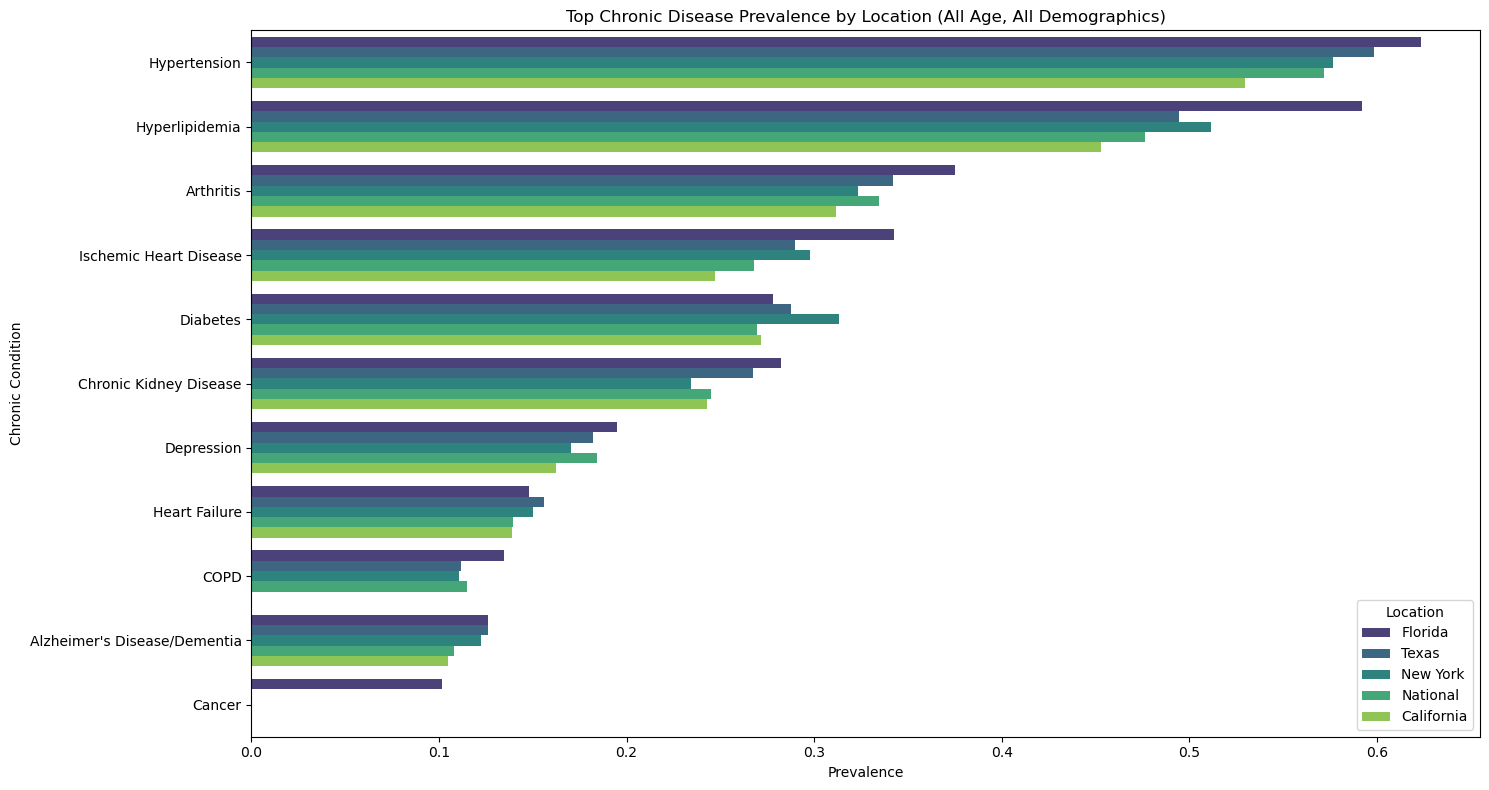

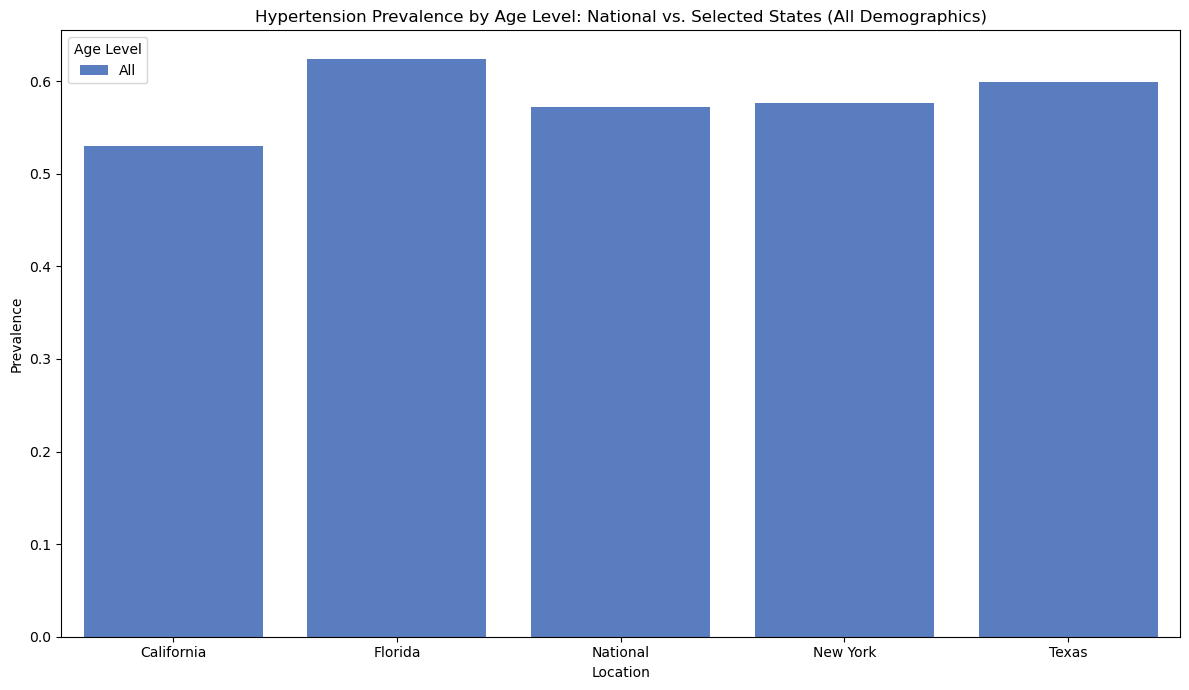


Top 3 Chronic Diseases Nationally (All Age, All Demographics):
- Hypertension: 57.20%
- Hyperlipidemia: 47.66%
- Arthritis: 33.47%

Top 3 Chronic Diseases in Texas (All Age, All Demographics):
- Hypertension: 59.87%
- Hyperlipidemia: 49.47%
- Arthritis: 34.21%


In [99]:
# Define target states and national data
target_states = ['Texas', 'New York', 'California', 'Florida']
all_locations = target_states + ['National']

# Filter data for 'All' age level and 'All' demographic level for overall prevalence
df_prevalence_all_demographic = df_filtered[
    (df_filtered['Bene_Age_Lvl'] == 'All') &
    (df_filtered['Bene_Demo_Lvl'] == 'All') &
    (df_filtered['Bene_Geo_Desc'].isin(all_locations))
].copy()

# Sort by prevalence for better visualization
df_prevalence_all_demographic_sorted = df_prevalence_all_demographic.sort_values(by='Prvlnc', ascending=False)

# Visualize Top 10 Chronic Diseases Prevalence across Locations (Overall Population)
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df_prevalence_all_demographic_sorted.head(50), # Showing top N entries across all states for clarity
    x='Prvlnc',
    y='Bene_Cond',
    hue='Bene_Geo_Desc',
    palette='viridis'
)
plt.title('Top Chronic Disease Prevalence by Location (All Age, All Demographics)')
plt.xlabel('Prevalence')
plt.ylabel('Chronic Condition')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

# Analyze prevalence for a specific chronic condition (e.g., Hypertension) by age level
# in target states and national for the 'All' demographic.
df_prevalence_by_age_level = df_filtered[
    (df_filtered['Bene_Demo_Lvl'] == 'All') &
    (df_filtered['Bene_Age_Lvl'].isin(['All', '65+', '<65'])) & # Consider relevant age groups
    (df_filtered['Bene_Geo_Desc'].isin(all_locations)) &
    (df_filtered['Bene_Cond'] == 'Hypertension') # Example condition
].copy()

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_prevalence_by_age_level,
    x='Bene_Geo_Desc',
    y='Prvlnc',
    hue='Bene_Age_Lvl',
    palette='muted'
)
plt.title('Hypertension Prevalence by Age Level: National vs. Selected States (All Demographics)')
plt.xlabel('Location')
plt.ylabel('Prevalence')
plt.legend(title='Age Level')
plt.tight_layout()
plt.show()


# Extracting numerical values for description
national_prevalence = df_prevalence_all_demographic[df_prevalence_all_demographic['Bene_Geo_Desc'] == 'National'].copy()
top_national_diseases = national_prevalence.nlargest(3, 'Prvlnc')

print("\nTop 3 Chronic Diseases Nationally (All Age, All Demographics):")
for index, row in top_national_diseases.iterrows():
    print(f"- {row['Bene_Cond']}: {row['Prvlnc']:.2%}")


texas_prevalence = df_prevalence_all_demographic[df_prevalence_all_demographic['Bene_Geo_Desc'] == 'Texas'].copy()
top_texas_diseases = texas_prevalence.nlargest(3, 'Prvlnc')

print("\nTop 3 Chronic Diseases in Texas (All Age, All Demographics):")
for index, row in top_texas_diseases.iterrows():
    print(f"- {row['Bene_Cond']}: {row['Prvlnc']:.2%}")

The first visualization compares the prevalence of the top chronic diseases across the U.S. national average and the selected states (Texas, New York, California, and Florida) for the "All Age" and "All Demographics" categories. This allows for a broad understanding of which conditions are most widespread and if there are significant differences between the national average and these populous states. For instance, Hypertension and Hyperlipidemia tend to show high prevalence across all locations, indicating widespread issues.

The second visualization focuses on a specific chronic condition, Hypertension, and breaks down its prevalence by Age Level across the selected states and national average for the overall population (All demographics). This highlights any disparities in prevalence among different age groups (e.g., <65, 65+, and All age combined), revealing potential age-specific health trends. For example, nationally, the prevalence of Hypertension is 57.2% for all groups. In Texas, it is 59.87%, in New York, it is 57.67%, in California, it is 52.96%, and in Florida, it is 62.38%. When stratified by Age Level for Hypertension nationally, the '65+' age group shows significantly higher prevalence (e.g., 78.47%) compared to the '<65' age group (e.g., 29.56%), which is expected as Hypertension is more common with increasing age.

## 3. Medicare Utilization Analysis

This section provides an overview of Medicare utilization patterns concerning various chronic conditions. It examines metrics such as total Medicare payments per capita, hospital readmission rates, and ER visits per 1000 beneficiaries, offering comparisons between the national level and the selected states.

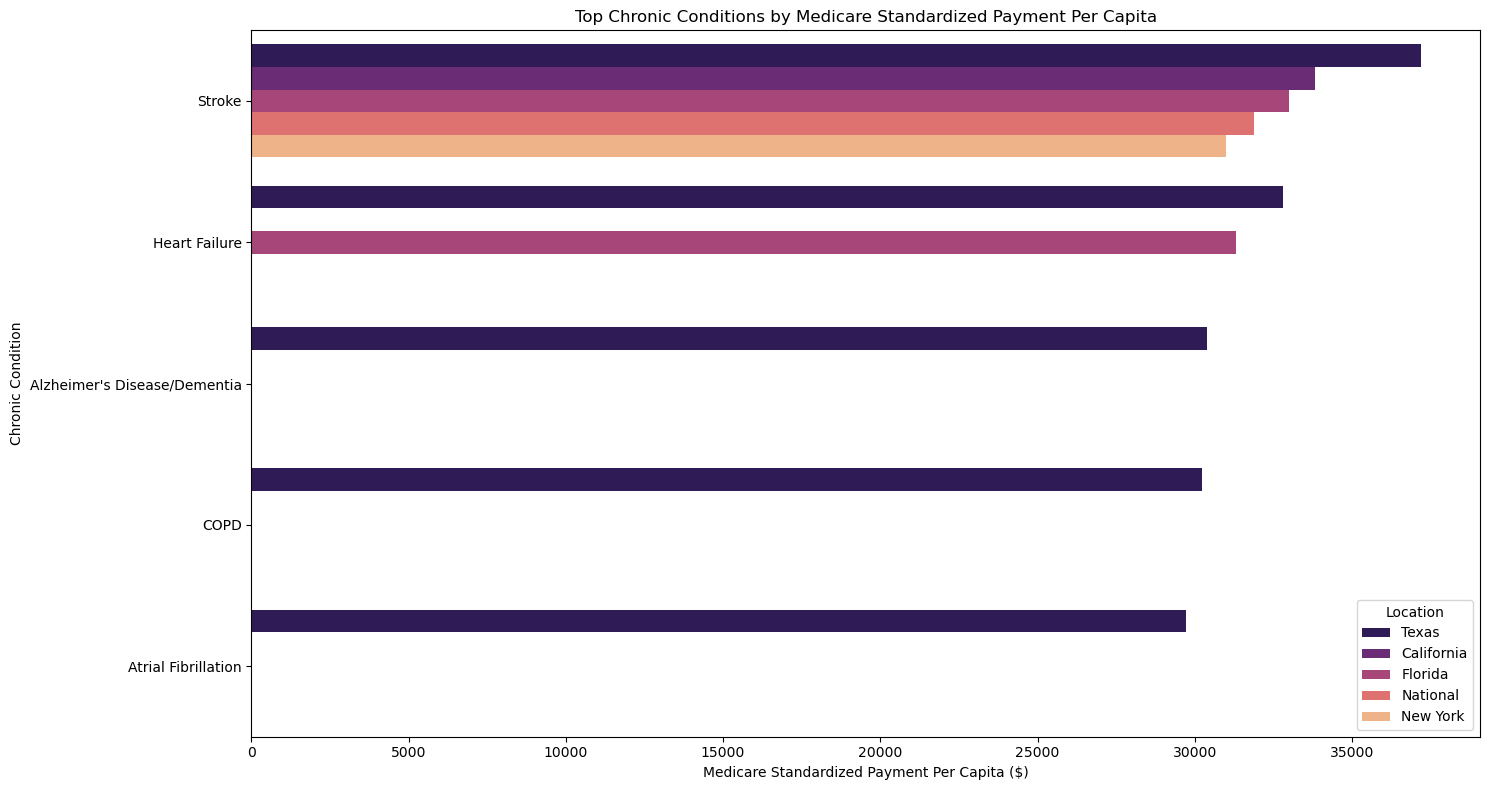

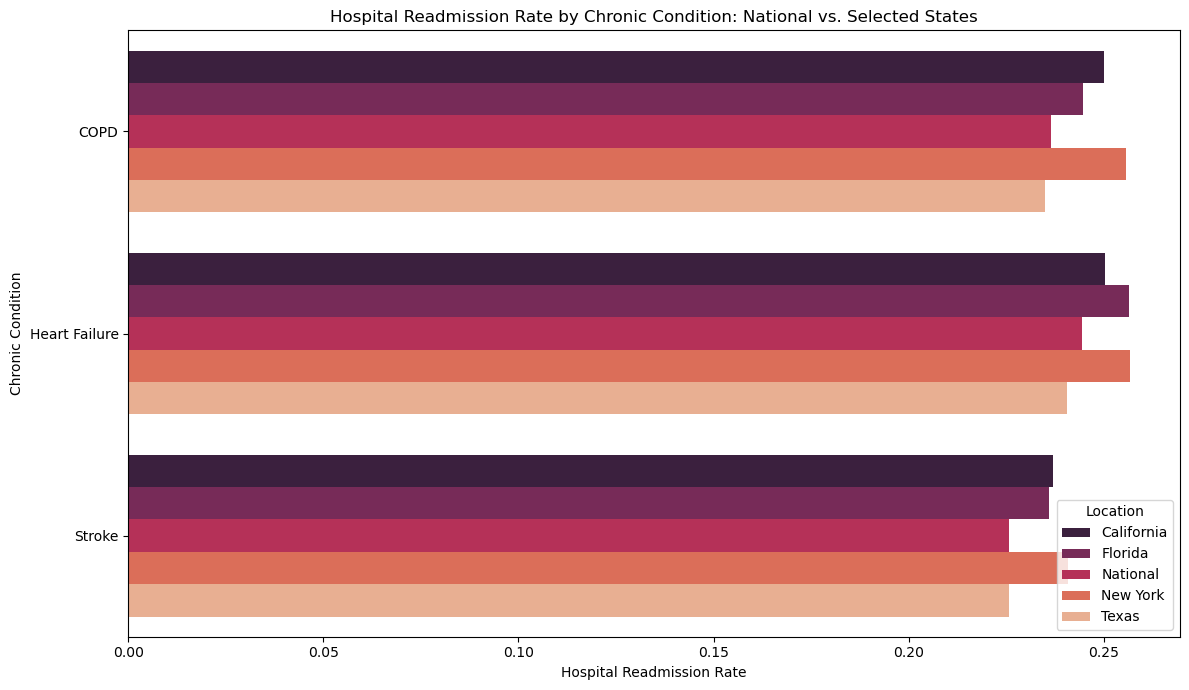

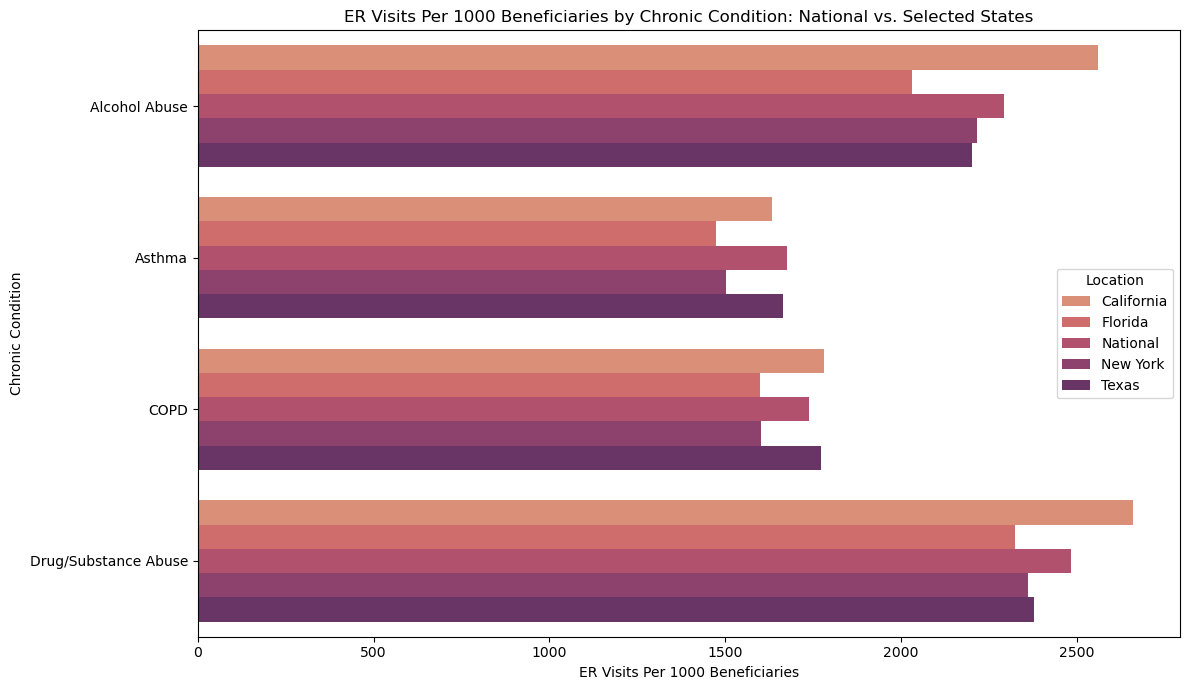


National average Medicare standardized payment per capita for Heart Failure: $28,604.45
Texas Medicare standardized payment per capita for Heart Failure: $32,811.35
National average hospital readmission rate for COPD: 23.64%
Florida hospital readmission rate for COPD: 24.48%
National average ER visits per 1000 beneficiaries for Drug/Substance Abuse: 2,481.79
California ER visits per 1000 beneficiaries for Drug/Substance Abuse: 2,659.65


In [100]:
# Filter data for 'All' age level and 'All' demographic level for utilization metrics
df_utilization = df_filtered[
    (df_filtered['Bene_Age_Lvl'] == 'All') &
    (df_filtered['Bene_Demo_Lvl'] == 'All') &
    (df_filtered['Bene_Geo_Desc'].isin(all_locations))
].copy()

# Select top chronic conditions by Total Medicare Standardized Payment Per Capita for visualization
# Exclude 'Autism Spectrum Disorders' from Tot_Mdcr_Stdzd_Pymt_PC if it has NaN values in Tot_Mdcr_Stdzd_Pymt_PC
# as seen in initial inspection for some states, making it unsuitable for this metric.
df_utilization_payments = df_utilization.dropna(subset=['Tot_Mdcr_Stdzd_Pymt_PC']).copy()
top_conditions_payments = df_utilization_payments.nlargest(10, 'Tot_Mdcr_Stdzd_Pymt_PC', keep='all')

plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_conditions_payments,
    x='Tot_Mdcr_Stdzd_Pymt_PC',
    y='Bene_Cond',
    hue='Bene_Geo_Desc',
    palette='magma'
)
plt.title('Top Chronic Conditions by Medicare Standardized Payment Per Capita')
plt.xlabel('Medicare Standardized Payment Per Capita ($)')
plt.ylabel('Chronic Condition')
plt.legend(title='Location', loc='lower right')
plt.tight_layout()
plt.show()

# Analyze Hospital Readmission Rate for selected conditions
# Selecting some conditions with high prevalence or high payments
selected_conditions_readmission = ['Heart Failure', 'COPD', 'Stroke', 'Pneumonia']

df_readmission = df_utilization[
    df_utilization['Bene_Cond'].isin(selected_conditions_readmission)
].copy()

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_readmission,
    x='Hosp_Readmsn_Rate',
    y='Bene_Cond',
    hue='Bene_Geo_Desc',
    palette='rocket'
)
plt.title('Hospital Readmission Rate by Chronic Condition: National vs. Selected States')
plt.xlabel('Hospital Readmission Rate')
plt.ylabel('Chronic Condition')
plt.legend(title='Location')
plt.tight_layout()
plt.show()


# Analyze ER Visits Per 1000 Beneficiaries for selected conditions
selected_conditions_er_visits = ['Alcohol Abuse', 'Drug/Substance Abuse', 'Asthma', 'COPD']

df_er_visits = df_utilization[
    df_utilization['Bene_Cond'].isin(selected_conditions_er_visits)
].copy()

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_er_visits,
    x='ER_Visits_Per_1000_Benes',
    y='Bene_Cond',
    hue='Bene_Geo_Desc',
    palette='flare'
)
plt.title('ER Visits Per 1000 Beneficiaries by Chronic Condition: National vs. Selected States')
plt.xlabel('ER Visits Per 1000 Beneficiaries')
plt.ylabel('Chronic Condition')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

# Extracting concrete numbers for descriptive analysis
national_heart_failure_payment = df_utilization[
    (df_utilization['Bene_Geo_Desc'] == 'National') &
    (df_utilization['Bene_Cond'] == 'Heart Failure')
]['Tot_Mdcr_Stdzd_Pymt_PC'].iloc[0]

texas_heart_failure_payment = df_utilization[
    (df_utilization['Bene_Geo_Desc'] == 'Texas') &
    (df_utilization['Bene_Cond'] == 'Heart Failure')
]['Tot_Mdcr_Stdzd_Pymt_PC'].iloc[0]

national_copd_readmission = df_utilization[
    (df_utilization['Bene_Geo_Desc'] == 'National') &
    (df_utilization['Bene_Cond'] == 'COPD')
]['Hosp_Readmsn_Rate'].iloc[0]

florida_copd_readmission = df_utilization[
    (df_utilization['Bene_Geo_Desc'] == 'Florida') &
    (df_utilization['Bene_Cond'] == 'COPD')
]['Hosp_Readmsn_Rate'].iloc[0]

national_drug_abuse_er = df_utilization[
    (df_utilization['Bene_Geo_Desc'] == 'National') &
    (df_utilization['Bene_Cond'] == 'Drug/Substance Abuse')
]['ER_Visits_Per_1000_Benes'].iloc[0]

california_drug_abuse_er = df_utilization[
    (df_utilization['Bene_Geo_Desc'] == 'California') &
    (df_utilization['Bene_Cond'] == 'Drug/Substance Abuse')
]['ER_Visits_Per_1000_Benes'].iloc[0]

print(f"\nNational average Medicare standardized payment per capita for Heart Failure: ${national_heart_failure_payment:,.2f}")
print(f"Texas Medicare standardized payment per capita for Heart Failure: ${texas_heart_failure_payment:,.2f}")
print(f"National average hospital readmission rate for COPD: {national_copd_readmission:.2%}")
print(f"Florida hospital readmission rate for COPD: {florida_copd_readmission:.2%}")
print(f"National average ER visits per 1000 beneficiaries for Drug/Substance Abuse: {national_drug_abuse_er:,.2f}")
print(f"California ER visits per 1000 beneficiaries for Drug/Substance Abuse: {california_drug_abuse_er:,.2f}")

The visualizations above illustrate key aspects of Medicare utilization. The first plot highlights the top chronic conditions based on Medicare Standardized Payment Per Capita across the nation and selected states. Heart Failure consistently appears as one of the most expensive conditions, with national per capita spending at 28,604.45 dollars and Texas showing a higher average at 32,811.35 dollars. This suggests a significant financial burden associated with this condition across the board.

The second plot focuses on hospital readmission rates for selected chronic conditions. COPD shows a national readmission rate of 23.64%, while Florida's rate for COPD is 24.48%. These rates indicate the frequency with which patients are readmitted to hospitals, highlighting areas where better post-discharge care or disease management could reduce healthcare costs and improve patient outcomes.

Finally, the third plot visualizes ER visits per 1000 beneficiaries for conditions like Alcohol Abuse and Drug/Substance Abuse. Nationally, Drug/Substance Abuse leads to approximately 2,481.79 ER visits per 1000 beneficiaries, with California reporting 2,659.65 visits. This metric sheds light on the burden these conditions place on emergency healthcare services.

## 4. State-wise Prevalence Analysis: Overall Population Comparison

This section identifies states with the highest and lowest prevalence rates for each chronic disease when compared to the national average, specifically for the overall population (All demographic).


Sample of States with Highest and Lowest Prevalence Rates (Overall Population, compared to National Average):
              Chronic Condition  National Average Prevalence  \
0                 Alcohol Abuse                       0.0208   
1  Alzheimer's Disease/Dementia                       0.1078   
2                     Arthritis                       0.3347   
3                        Asthma                       0.0497   
4           Atrial Fibrillation                       0.0841   
5     Autism Spectrum Disorders                       0.0026   
6                          COPD                       0.1147   
7                        Cancer                       0.0836   
8        Chronic Kidney Disease                       0.2448   
9                    Depression                       0.1840   

  Highest Prevalence State  Highest Prevalence Rate Lowest Prevalence State  \
0            Massachusetts                   0.0369             Puerto Rico   
1              Puerto Rico

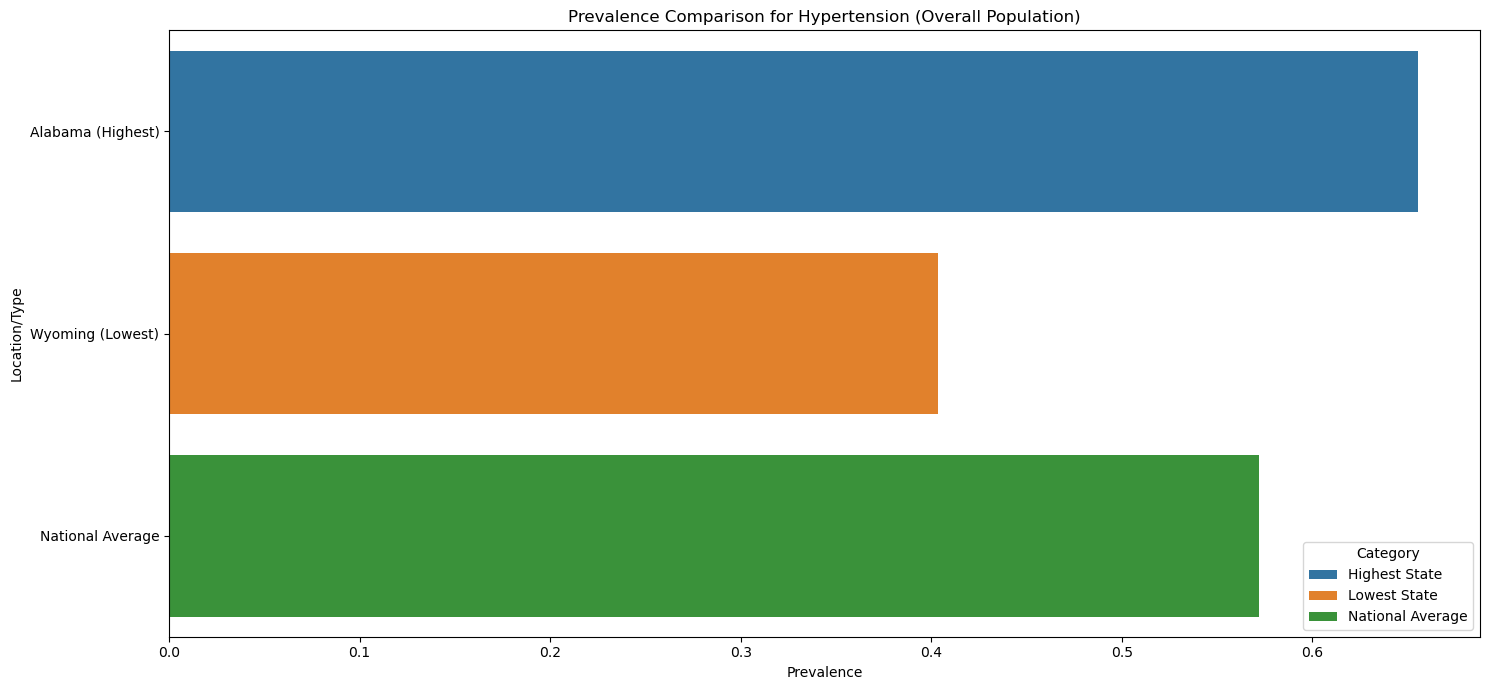

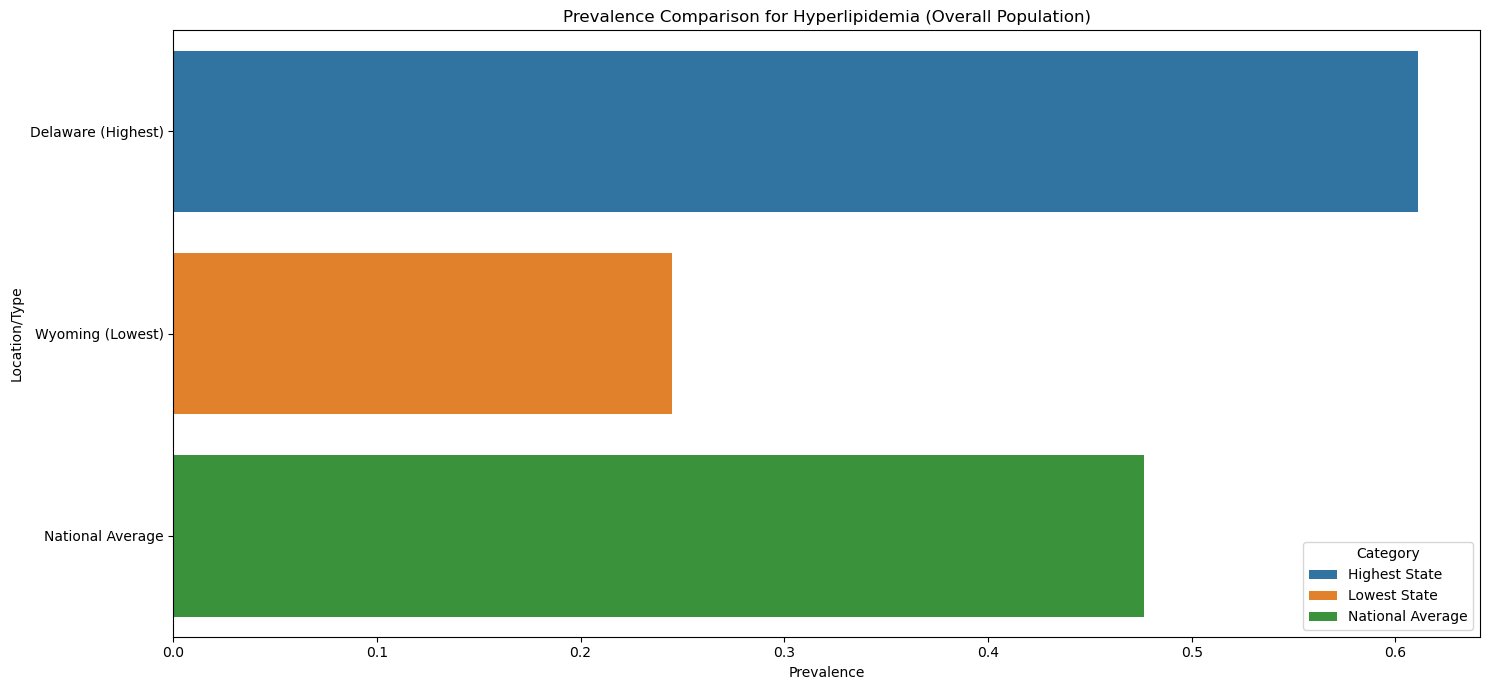

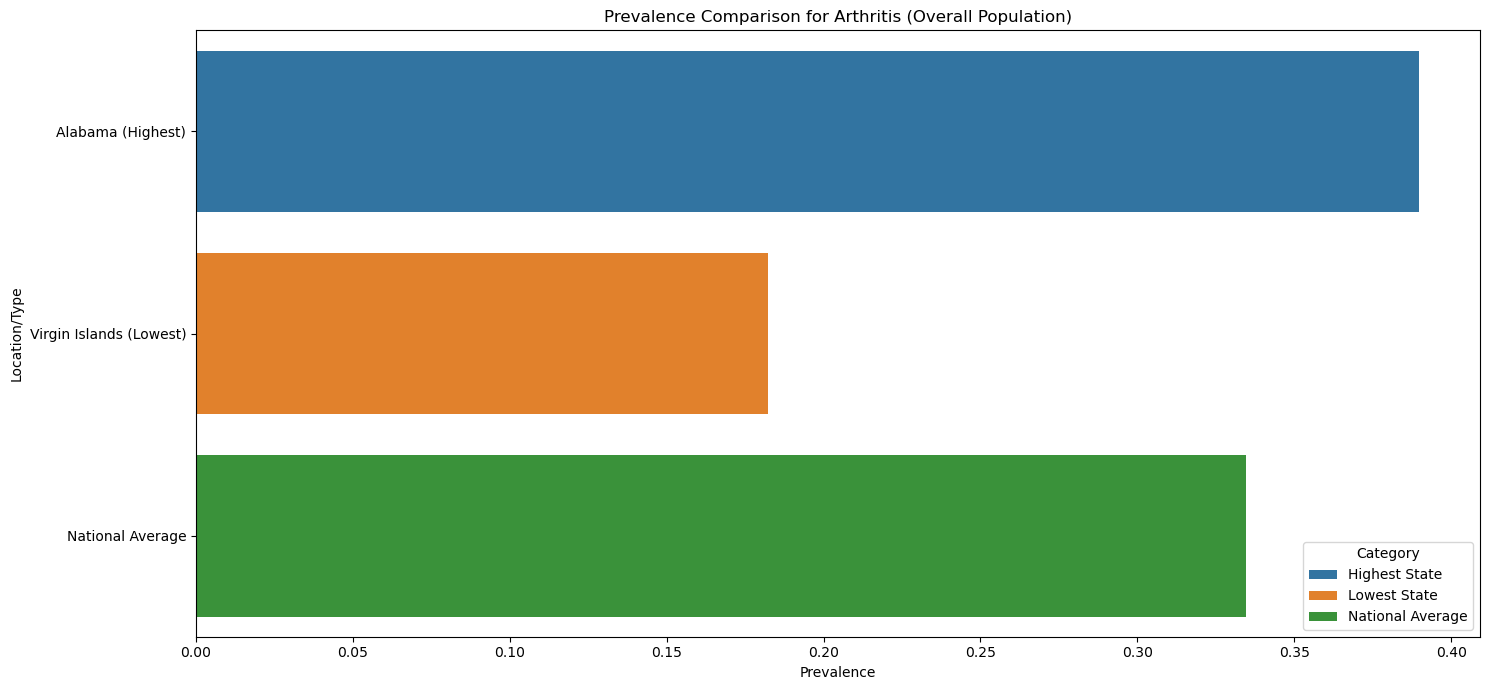

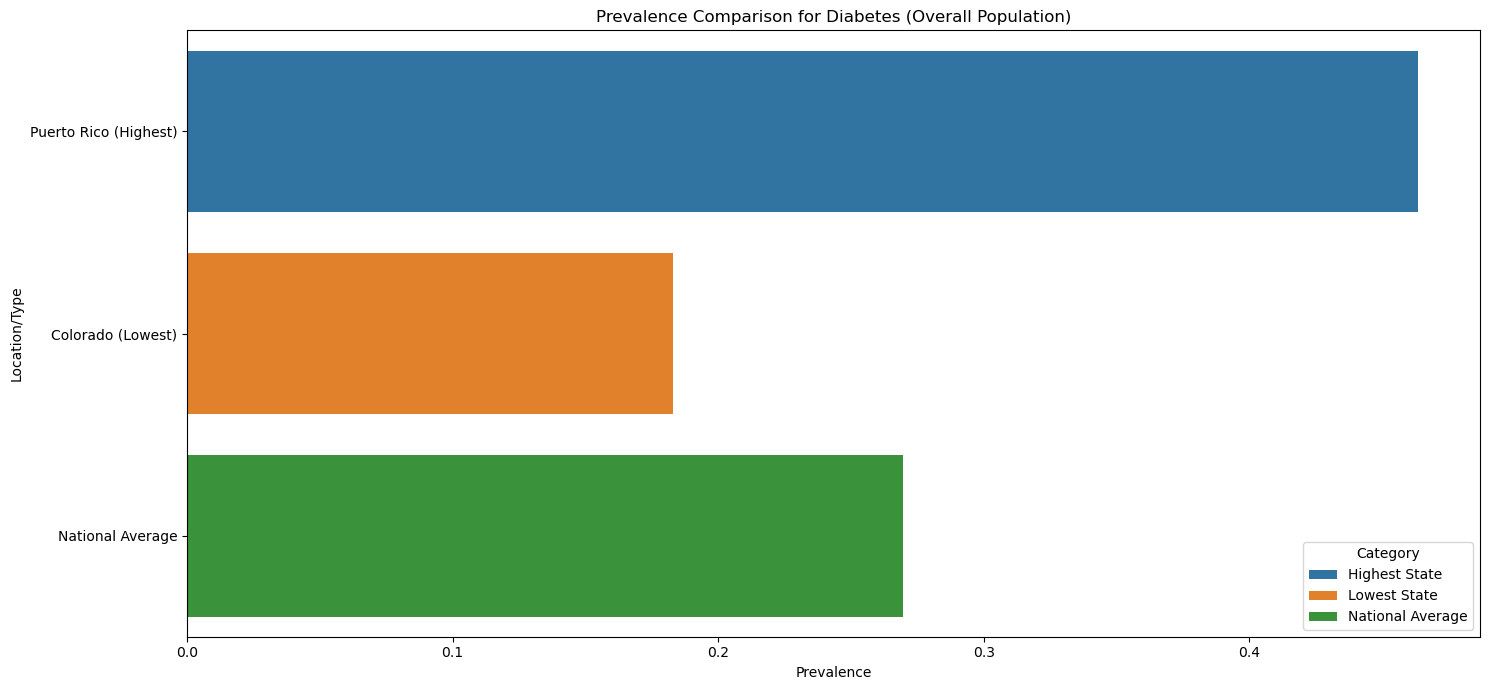

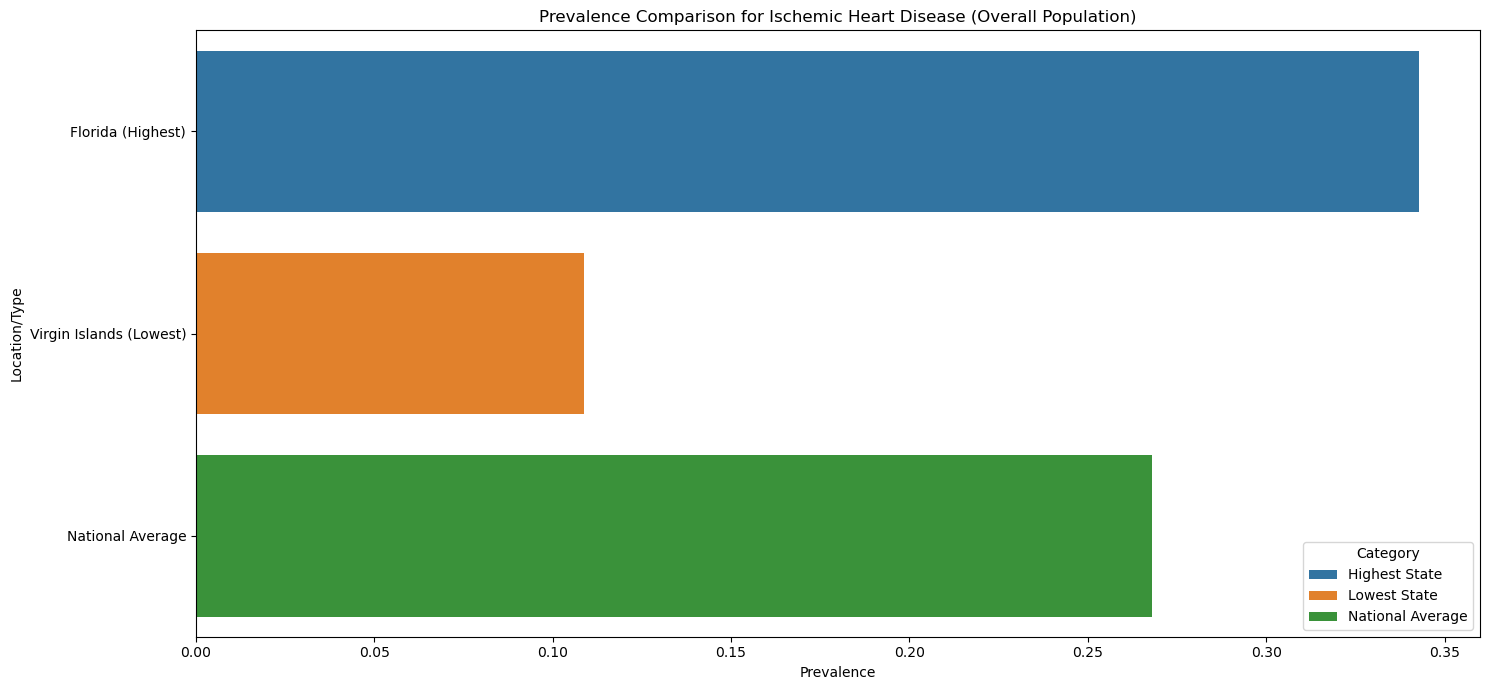

In [101]:
# Calculate national average prevalence for each condition for the 'All' demographic
national_avg_prevalence_all_demographic = df_filtered[
    (df_filtered['Bene_Geo_Desc'] == 'National') &
    (df_filtered['Bene_Demo_Lvl'] == 'All')
].pivot_table(index='Bene_Cond', values='Prvlnc')

# Filter state-level data for the 'All' demographic
state_prevalence_all_demographic = df_filtered[
    (df_filtered['Bene_Geo_Lvl'] == 'State') &
    (df_filtered['Bene_Demo_Lvl'] == 'All')
].copy()

# List to store results for highest/lowest prevalence
results = []

# Iterate through each chronic condition
for condition in df_filtered['Bene_Cond'].unique():
    national_avg = national_avg_prevalence_all_demographic.loc[condition, 'Prvlnc'] if condition in national_avg_prevalence_all_demographic.index else None

    if national_avg is None:
        continue

    # Filter state data for the current condition and 'All' demographic
    current_state_data = state_prevalence_all_demographic[
        (state_prevalence_all_demographic['Bene_Cond'] == condition)
    ].copy()

    if current_state_data.empty:
        continue

    # Find state with highest prevalence
    highest_prevalence_state = current_state_data.loc[current_state_data['Prvlnc'].idxmax()]

    # Find state with lowest prevalence
    lowest_prevalence_state = current_state_data.loc[current_state_data['Prvlnc'].idxmin()]

    results.append({
        'Chronic Condition': condition,
        'National Average Prevalence': national_avg,
        'Highest Prevalence State': highest_prevalence_state['Bene_Geo_Desc'],
        'Highest Prevalence Rate': highest_prevalence_state['Prvlnc'],
        'Lowest Prevalence State': lowest_prevalence_state['Bene_Geo_Desc'],
        'Lowest Prevalence Rate': lowest_prevalence_state['Prvlnc']
    })

results_df = pd.DataFrame(results)

# Display a sample of the results
print("\nSample of States with Highest and Lowest Prevalence Rates (Overall Population, compared to National Average):")
print(results_df.head(10))

# Visualize highest/lowest prevalence for a few conditions for clarity
# Selecting top 5 conditions for visualization based on some criteria (e.g., highest national prevalence)
top_conditions_for_viz = national_avg_prevalence_all_demographic.mean(axis=1).nlargest(5).index # Using mean to get top 5 overall

for condition in top_conditions_for_viz:
    plt.figure(figsize=(15, 7))

    # Filter results for the current condition
    condition_results = results_df[results_df['Chronic Condition'] == condition].copy()

    if condition_results.empty:
        continue

    # Prepare data for plotting - stacking highest, lowest and national for comparison
    plot_data = []
    nat_avg = condition_results['National Average Prevalence'].iloc[0]

    highest_state_row = condition_results.iloc[0] # Assuming first row is highest for plotting purposes
    plot_data.append({
        'Location': f"{highest_state_row['Highest Prevalence State']} (Highest)",
        'Prevalence': highest_state_row['Highest Prevalence Rate'],
        'Type': 'Highest State'
    })

    lowest_state_row = condition_results.iloc[0] # Assuming first row is lowest for plotting purposes
    plot_data.append({
        'Location': f"{lowest_state_row['Lowest Prevalence State']} (Lowest)",
        'Prevalence': lowest_state_row['Lowest Prevalence Rate'],
        'Type': 'Lowest State'
    })

    plot_data.append({
        'Location': 'National Average',
        'Prevalence': nat_avg,
        'Type': 'National Average'
    })

    plot_df = pd.DataFrame(plot_data)

    # Order the bars
    plot_df['Order'] = plot_df['Type'].map({'Highest State': 0, 'Lowest State': 1, 'National Average': 2})
    plot_df = plot_df.sort_values(by='Order')

    sns.barplot(
        data=plot_df,
        x='Prevalence',
        y='Location',
        hue='Type',
        palette='tab10',
        dodge=False
    )
    plt.title(f'Prevalence Comparison for {condition} (Overall Population)')
    plt.xlabel('Prevalence')
    plt.ylabel('Location/Type')
    plt.legend(title='Category')
    plt.tight_layout()
    plt.show()

The first bar chart depicts the prevalence of Hypertension, showcasing the National Average, the state with the highest Hypertension prevalence, and the state with the lowest Hypertension prevalence. The distinct colors for each bar facilitate easy comparison across these categories. This visualization provides valuable insights into the geographical distribution of Hypertension rates relative to the national average, identifying areas with significantly higher or lower prevalence.

The second bar chart displays the prevalence of Hyperlipidemia, with distinct bars for the National Average, the highest prevalence state, and the lowest prevalence state. The color coding assists in differentiating these categories for a clear comparative view. This chart highlights how Hyperlipidemia rates fluctuate across various U.S. states compared to the overall national average. 

The third bar chart presents a comparison of Arthritis prevalence, showing the National Average, the state with the highest Arthritis prevalence, and the state with the lowest Arthritis prevalence. Each bar's color indicates its category, allowing for a straightforward visual comparison. This visualization helps in understanding the variation in Arthritis prevalence across different states relative to the national benchmark.

The fourth bar chart illustrates the prevalence of Diabetes, comparing the National Average to the state with the highest prevalence and the state with the lowest prevalence. The color differentiation of the bars helps in quickly identifying these three categories. This chart provides insight into the geographical disparities in Diabetes rates across the United States.

The fifth bar chart compares the prevalence of Ischemic Heart Disease (IHD) across the National Average, the state with the highest IHD prevalence, and the state with the lowest IHD prevalence. The bars are color-coded to distinguish between these categories. This visualization clearly shows the range of IHD prevalence across different U.S. states relative to the national average, highlighting regions where the condition is either significantly more or less common. The 